In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [3]:
df = pd.read_csv('tg_users_groups_actions_202412082008.csv')
df

,id,chat_id,action,action_from,action_to,reply_on_id,reply_on_chat_id,message_id,message_chat_id,time,created_at
0,61921,-1001255686586,message,490909755,NaN,NaN,NaN,1078,-1001255686586,2020-09-05 15:55:14.000 +0300,2024-12-02 23:54:43.617
1,61917,-1001255686586,message,447463387,NaN,NaN,NaN,1083,-1001255686586,2020-09-05 19:05:16.000 +0300,2024-12-02 23:54:43.186
2,61918,-1001255686586,message,447463387,NaN,NaN,NaN,1082,-1001255686586,2020-09-05 19:05:16.000 +0300,2024-12-02 23:54:43.395
3,61916,-1001255686586,message,520649308,NaN,NaN,NaN,1084,-1001255686586,2020-09-05 19:08:15.000 +0300,2024-12-02 23:54:43.005
4,61915,-1001255686586,message,369448325,NaN,NaN,NaN,1085,-1001255686586,2020-09-05 20:10:56.000 +0300,2024-12-02 23:54:42.861
...,...,...,...,...,...,...,...,...,...,...,...
118760,143750,-1001422302072,message,281655591,NaN,NaN,NaN,151807,-1001422302072,2024-12-08 16:20:43.000 +0300,2024-12-08 13:24:58.372
118761,143749,-1001422302072,message,1068019187,NaN,NaN,NaN,151809,-1001422302072,2024-12-08 16:23:35.000 +0300,2024-12-08 13:24:57.344
118762,143748,-1001422302072,message,281655591,NaN,NaN,NaN,151810,-1001422302072,2024-12-08 16:23:35.000 +0300,2024-12-08 13:24:56.420
118763,143747,-1001422302072,message,1068019187,NaN,NaN,NaN,151811,-1001422302072,2024-12-08 16:24:22.000 +0300,2024-12-08 13:24:55.528


In [6]:
new_df = df[df['message_id'] == 26219]
new_df

,id,chat_id,action,action_from,action_to,reply_on_id,reply_on_chat_id,message_id,message_chat_id,time,created_at
50233,18599,-1001489613436,message,5622322013,NaN,NaN,NaN,26219,-1001489613436,2024-10-01 22:17:01.000 +0300,2024-12-02 22:17:12.986
50234,18600,-1001489613436,reply,5622322013,NaN,26218.0,-1.001490e+12,26219,-1001489613436,2024-10-01 22:17:01.000 +0300,2024-12-02 22:17:13.023
51371,34332,-1001451022019,message,841217463,NaN,NaN,NaN,26219,-1001451022019,2024-10-25 19:09:13.000 +0300,2024-12-02 22:53:56.248


In [9]:
replies = df[df['action'] == 'reply']

messages = df[df['action'] == 'message']

result = []
for index, reply in replies.iterrows():
    reply_on_id = reply['reply_on_id']
    reply_on_chat_id = reply['reply_on_chat_id']
    
    matched_message = messages[
        (messages['message_id'] == reply_on_id) & 
        (messages['message_chat_id'] == reply_on_chat_id)
    ]
    
    if not matched_message.empty:
        action_from_reply = reply['action_from']
        action_from_message = matched_message['action_from'].values[0]
        pair = {
            'action_from_reply': action_from_reply,
            'action_from_message': action_from_message,
            'reply_on_id': reply_on_id,
            'reply_on_chat_id': reply_on_chat_id
        }
        result.append(pair)

new_df = pd.DataFrame(result)

print(new_df)


     action_from_reply  action_from_message  reply_on_id  reply_on_chat_id
0            390641069           6965880039      24534.0     -1.001490e+12
1           1309325426           6965880039      24534.0     -1.001490e+12
2           1309325426           6965880039      24540.0     -1.001490e+12
3           1309325426           6965880039      24542.0     -1.001490e+12
4           1309325426           6965880039      24542.0     -1.001490e+12
..                 ...                  ...          ...               ...
534         5308325708            441006759     237219.0     -1.001123e+12
535          441006759           5308325708     237220.0     -1.001123e+12
536         1294846642           1000806250     237217.0     -1.001123e+12
537          363153678            929611161        643.0     -1.001989e+12
538         1434730527            800385102      53145.0     -1.001452e+12

[539 rows x 4 columns]


In [10]:
pip install networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.4 MB/s eta 0:00:00-:--:--
Note: you may need to restart the kernel to use updated packages.


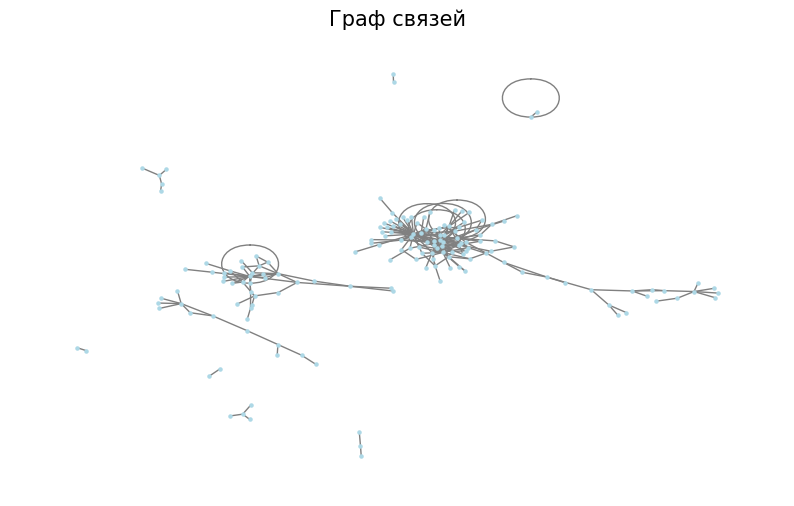

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for index, row in new_df.iterrows():
    G.add_edge(row['action_from_reply'], row['action_from_message'])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, edge_color='gray')


nx.draw_networkx_nodes(G, pos, node_size=5, node_color='lightblue')
# Отрисовываем метки узлов
#nx.draw_networkx_labels(G, pos, font_size=8, font_color='darkblue', font_weight='bold')

plt.title('Граф связей', fontsize=15)
plt.axis('off') 
plt.show()



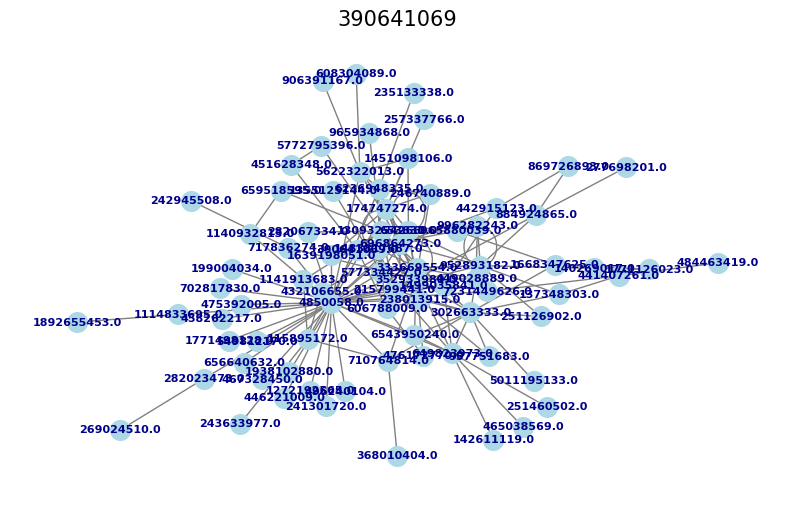

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


replies = df[df['action'] == 'reply']

messages = df[df['action'] == 'message']

result = []
for index, reply in replies.iterrows():
    reply_on_id = reply['reply_on_id']
    reply_on_chat_id = reply['reply_on_chat_id']

    matched_message = messages[
        (messages['message_id'] == reply_on_id) & 
        (messages['message_chat_id'] == reply_on_chat_id)
    ]
    
    if not matched_message.empty:
        action_from_reply = reply['action_from']
        action_from_message = matched_message['action_from'].values[0]
        pair = {
            'action_from_reply': action_from_reply,
            'action_from_message': action_from_message,
            'reply_on_id': reply_on_id,
            'reply_on_chat_id': reply_on_chat_id
        }
        result.append(pair)

new_df = pd.DataFrame(result)

G = nx.Graph()

for index, row in new_df.iterrows():
    G.add_edge(row['action_from_reply'], row['action_from_message'])

specified_action_from = 390641069
connected_components = list(nx.connected_components(G))

component_to_draw = None
for component in connected_components:
    if specified_action_from in component:
        component_to_draw = component
        break

if component_to_draw is not None:
    subgraph = G.subgraph(component_to_draw)
    
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(subgraph)

    nx.draw_networkx_edges(subgraph, pos, edge_color='gray')

    nx.draw_networkx_nodes(subgraph, pos, node_size=200, node_color='lightblue')

    nx.draw_networkx_labels(subgraph, pos, font_size=8, font_color='darkblue', font_weight='bold')

    plt.title(specified_action_from, fontsize=15)
    plt.axis('off')
    plt.show()
else:
    print('Не найдено компоненты связности, содержащей заданное значение action_from.')


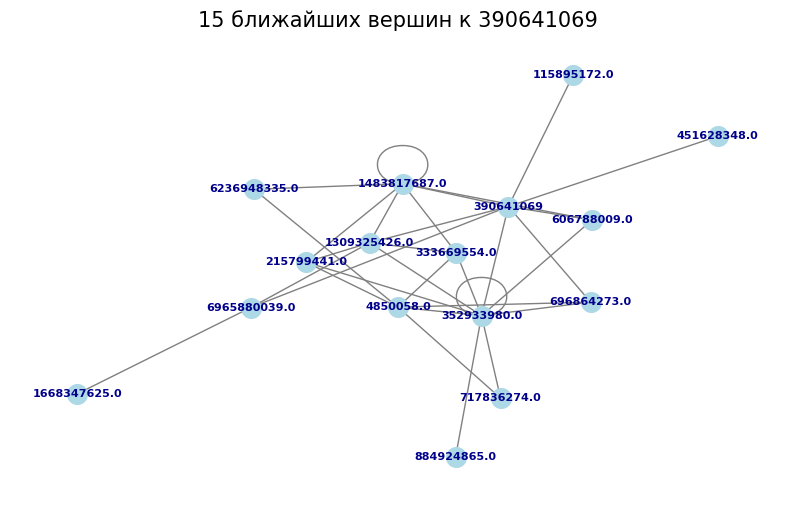

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

replies = df[df['action'] == 'reply']
messages = df[df['action'] == 'message']

result = []
for index, reply in replies.iterrows():
    reply_on_id = reply['reply_on_id']
    reply_on_chat_id = reply['reply_on_chat_id']
    
    matched_message = messages[
        (messages['message_id'] == reply_on_id) & 
        (messages['message_chat_id'] == reply_on_chat_id)
    ]
    
    if not matched_message.empty:
        action_from_reply = reply['action_from']
        action_from_message = matched_message['action_from'].values[0]
        
        pair = {
            'action_from_reply': action_from_reply,
            'action_from_message': action_from_message,
            'reply_on_id': reply_on_id,
            'reply_on_chat_id': reply_on_chat_id
        }
        result.append(pair)

new_df = pd.DataFrame(result)

G = nx.Graph()

for index, row in new_df.iterrows():
    G.add_edge(row['action_from_reply'], row['action_from_message'])

specified_action_from = 390641069 

distance_dict = nx.single_source_shortest_path_length(G, specified_action_from)

nearest_nodes = sorted(distance_dict.items(), key=lambda x: x[1])[1:16]
nearest_nodes = [node[0] for node in nearest_nodes]

subgraph = G.subgraph(nearest_nodes + [specified_action_from])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(subgraph)

nx.draw_networkx_edges(subgraph, pos, edge_color='gray')

nx.draw_networkx_nodes(subgraph, pos, node_size=200, node_color='lightblue')

nx.draw_networkx_labels(subgraph, pos, font_size=8, font_color='darkblue', font_weight='bold')

plt.title(f'15 ближайших вершин к {specified_action_from}', fontsize=15)
plt.axis('off')
plt.show()
